This project shows how to perform a mall customers segmentation using Machine Learning algorithms. This is the unsupervised clustering problem.

# Introduction 
The main task of clustering is to discover natural groups within an unlabelled dataset - this means that's an unsuprvised ML task. And it's an important one,  as it is used in many scientific, engineering and business domains. One of the most known application of clustering are:

customers segmentation (for efficient marketing) ,
 image segmentation ,
 documents clusterisation.

## Importing Libraries

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [133]:
dataset = pd.read_csv("Mall_Customers.csv")

In [134]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Exploratory Data Analysis
This section contains a basic statistical investigation of a given database. It is a crucial point in any analysis as it allows for a better understanding of the underlying data.

In [135]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


There are 5 columns:

Customer ID - numerical - unique customer number - integer  

Gender - categorical - binary (Male/Female)  

Age - numerical - integer  

Annual Income (k$) - numerical - integer  

Spending Score (1-100) - numerical - integer

In [136]:
# To check null value
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

* There are no missing data. This simplifies the analysis but it is a very unlikely scenario in a real-life where analysts spend a significant amount of time cleaning their data before the core analysis is performed

In [137]:
dataset.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [138]:
dataset = dataset.rename(columns={'Annual Income (k$)':'Income','Spending Score (1-100)':'Spending Score'})

In [139]:
dataset

,CustomerID,Gender,Age,Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [140]:
dataset.describe()

,CustomerID,Age,Income,Spending Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Visualize the data

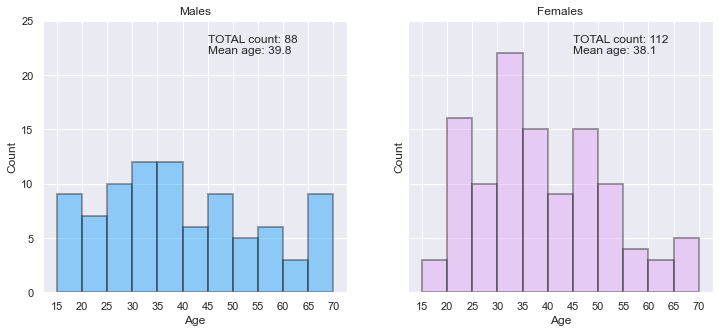

In [141]:
males_age = dataset[dataset['Gender']=='Male']['Age'] # subset with males age
females_age = dataset[dataset['Gender']=='Female']['Age'] # subset with females age

age_bins = range(15,75,5)

# males histogram
fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5), sharey=True)
sns.distplot(males_age, bins=age_bins, kde=False, color='#0099ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(age_bins)
ax1.set_ylim(top=25)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(45,23, "TOTAL count: {}".format(males_age.count()))
ax1.text(45,22, "Mean age: {:.1f}".format(males_age.mean()))


# females histogram
sns.distplot(females_age, bins=age_bins, kde=False, color='#de9af7', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(age_bins)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(45,23, "TOTAL count: {}".format(females_age.count()))
ax2.text(45,22, "Mean age: {:.1f}".format(females_age.mean()))

plt.show()

In [142]:
print('Kolgomorov-Smirnov test p-value: {:.2f}'.format(stats.ks_2samp(males_age, females_age)[1]))

Kolgomorov-Smirnov test p-value: 0.49


* The average age of male customers is lightly higher than female ones (39.8 versus 38.1). Distribution of male age is more uniform than females, where we can observe that the biggest age group is 30-35 years old. Kolgomorov-Smirnov test shows that the differences between these two groups are statistically insignificant.

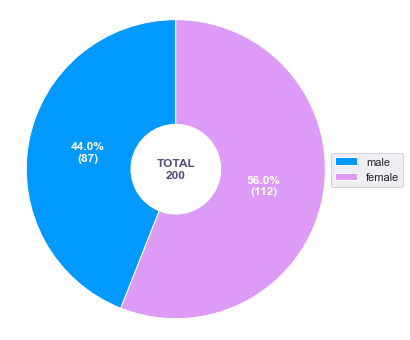

In [143]:
def labeler(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

sizes = [males_age.count(),females_age.count()] # wedge sizes

fig0, ax1 = plt.subplots(figsize=(6,6))
wedges, texts, autotexts = ax1.pie(sizes,
                                   autopct=lambda pct: labeler(pct, sizes),
                                   radius=1,
                                   colors=['#0099ff','#de9af7'],
                                   startangle=90,
                                   textprops=dict(color="w"),
                                   wedgeprops=dict(width=0.7, edgecolor='w'))

ax1.legend(wedges, ['male','female'],
           loc='center right',
           bbox_to_anchor=(0.7, 0, 0.5, 1))

plt.text(0,0, 'TOTAL\n{}'.format(dataset['Age'].count()),
         weight='bold', size=12, color='#52527a',
         ha='center', va='center')

plt.setp(autotexts, size=12, weight='bold')
ax1.axis('equal')  # Equal aspect ratio
plt.show()

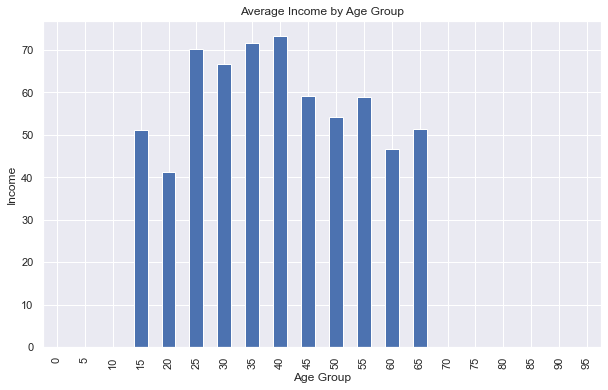

In [144]:
# To find the relation between age and income
# Grouping the data by age and calculating the average income for each age group
dataset['Age_Group'] = pd.cut(dataset['Age'], bins=range(0, 101, 5), labels=range(0, 100, 5))
age_income_avg = dataset.groupby('Age_Group')['Income'].mean()

# Creating a bar plot to visualize the relationship between age and income
age_income_avg.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Age Group')
plt.ylabel('Income')
plt.title('Average Income by Age Group')
plt.show()

* A bar chart above shows that the most wealthy customers are in age of 25-40 years old. 

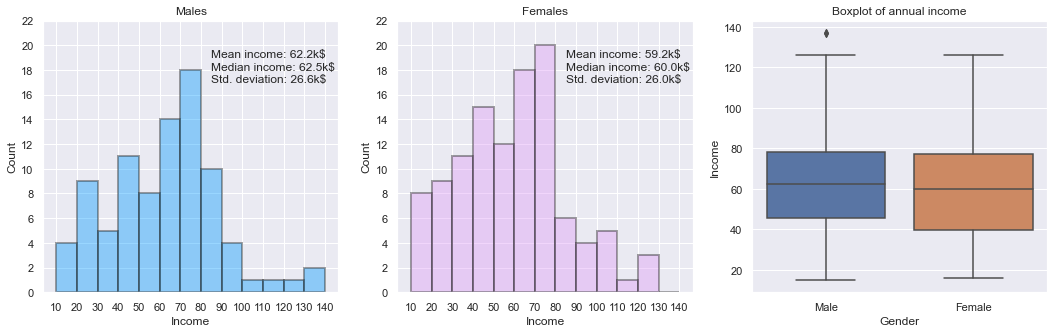

In [145]:
males_income = dataset[dataset['Gender']=='Male']['Income'] # subset with males income
females_income = dataset[dataset['Gender']=='Female']['Income'] # subset with females income

my_bins = range(10,150,10)

# males histogram
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,5))
sns.distplot(males_income, bins=my_bins, kde=False, color='#0099ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(my_bins)
ax1.set_yticks(range(0,24,2))
ax1.set_ylim(0,22)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(85,19, "Mean income: {:.1f}k$".format(males_income.mean()))
ax1.text(85,18, "Median income: {:.1f}k$".format(males_income.median()))
ax1.text(85,17, "Std. deviation: {:.1f}k$".format(males_income.std()))


# females histogram
sns.distplot(females_income, bins=my_bins, kde=False, color='#de9af7', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(my_bins)
ax2.set_yticks(range(0,24,2))
ax2.set_ylim(0,22)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(85,19, "Mean income: {:.1f}k$".format(females_income.mean()))
ax2.text(85,18, "Median income: {:.1f}k$".format(females_income.median()))
ax2.text(85,17, "Std. deviation: {:.1f}k$".format(females_income.std()))

# boxplot
sns.boxplot(x='Gender', y='Income', data=dataset, ax=ax3)
ax3.set_title('Boxplot of annual income')
plt.show()

In [146]:
print('Kolgomorov-Smirnov test p-value: {:.2f}'.format(stats.ks_2samp(males_income, females_income)[1]))


Kolgomorov-Smirnov test p-value: 0.78


* Mean income of males is higher than females (62.2 k vs. 59.2k). Also  median  income  of  male  customers  (62.5k)  is  higher  than  female  ones (60k). Standard  deviation  is  similar  for  both  groups.  There  is  one outlier in male group with an annual income of about 140k. K-S test shows that these two groups are not statistically different.

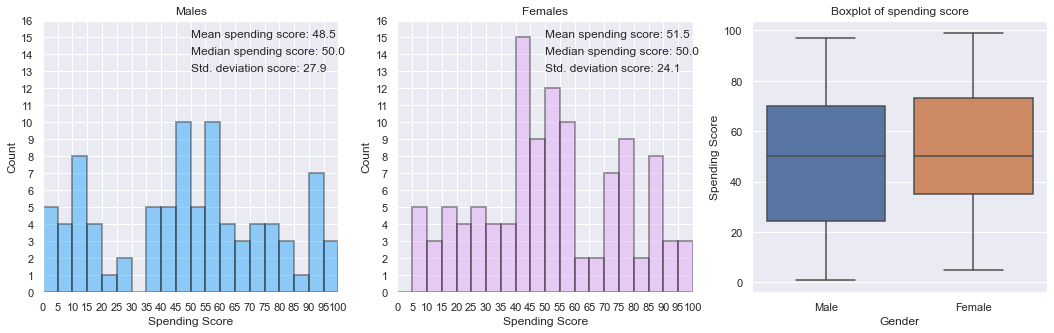

In [147]:
males_spending = dataset[dataset['Gender']=='Male']['Spending Score'] # subset with males age
females_spending =dataset[dataset['Gender']=='Female']['Spending Score'] # subset with females age

spending_bins = range(0,105,5)

# males histogram
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,5))
sns.distplot(males_spending, bins=spending_bins, kde=False, color='#0099ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(spending_bins)
ax1.set_xlim(0,100)
ax1.set_yticks(range(0,17,1))
ax1.set_ylim(0,16)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(50,15, "Mean spending score: {:.1f}".format(males_spending.mean()))
ax1.text(50,14, "Median spending score: {:.1f}".format(males_spending.median()))
ax1.text(50,13, "Std. deviation score: {:.1f}".format(males_spending.std()))

# females histogram
sns.distplot(females_spending, bins=spending_bins, kde=False, color='#de9af7', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(spending_bins)
ax2.set_xlim(0,100)
ax2.set_yticks(range(0,17,1))
ax2.set_ylim(0,16)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(50,15, "Mean spending score: {:.1f}".format(females_spending.mean()))
ax2.text(50,14, "Median spending score: {:.1f}".format(females_spending.median()))
ax2.text(50,13, "Std. deviation score: {:.1f}".format(females_spending.std()))



# boxplot
sns.boxplot(x='Gender', y='Spending Score', data=dataset, ax=ax3)
ax3.set_title('Boxplot of spending score')
plt.show()

plt.show()

In [148]:
print('Kolgomorov-Smirnov test p-value: {:.2f}'.format(stats.ks_2samp(males_spending, females_spending)[1]))

Kolgomorov-Smirnov test p-value: 0.29


* A mean spending score for women (51.5) is higher than men (48.5). The K-S test p-value indicates that there is no evidence to reject the null-hypothesis, however the evidence is not so strong as in previous comparisons. 

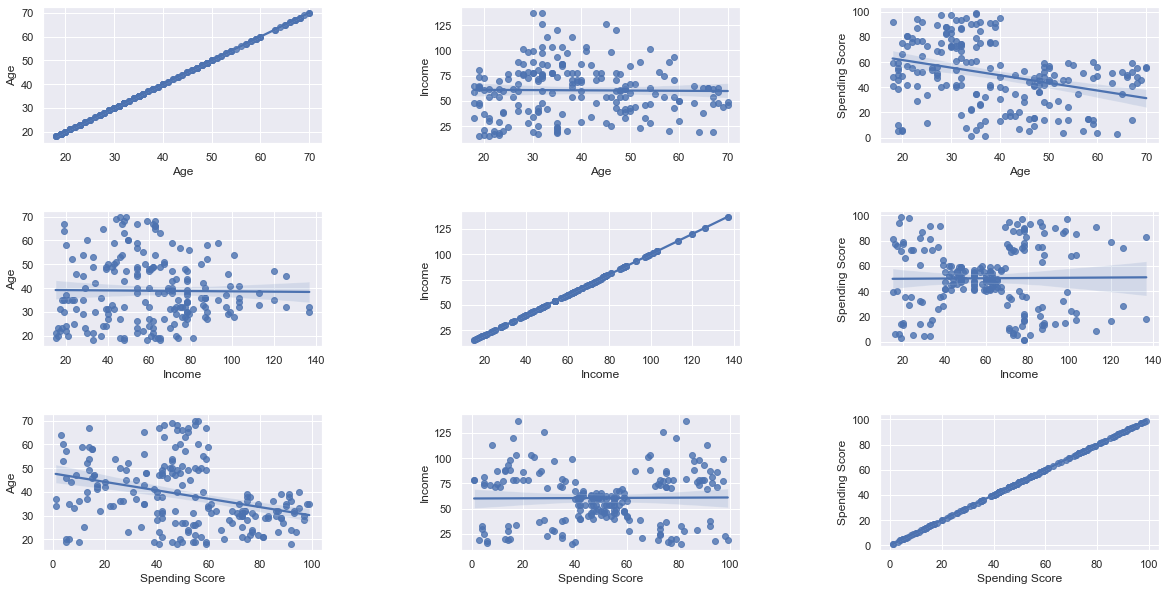

In [149]:
# Ploting the Relation between Age , Annual Income and Spending Score

plt.figure(1 , figsize = (20 , 10))
n = 0 
for x in ['Age' , 'Income' , 'Spending Score']:
    for y in ['Age' , 'Income' , 'Spending Score']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = dataset)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

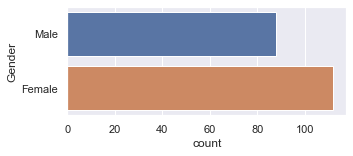

In [150]:
# Count Plot of Gender

plt.figure(1 , figsize = (5 , 2))
sns.countplot(y = 'Gender' , data = dataset)
plt.show()


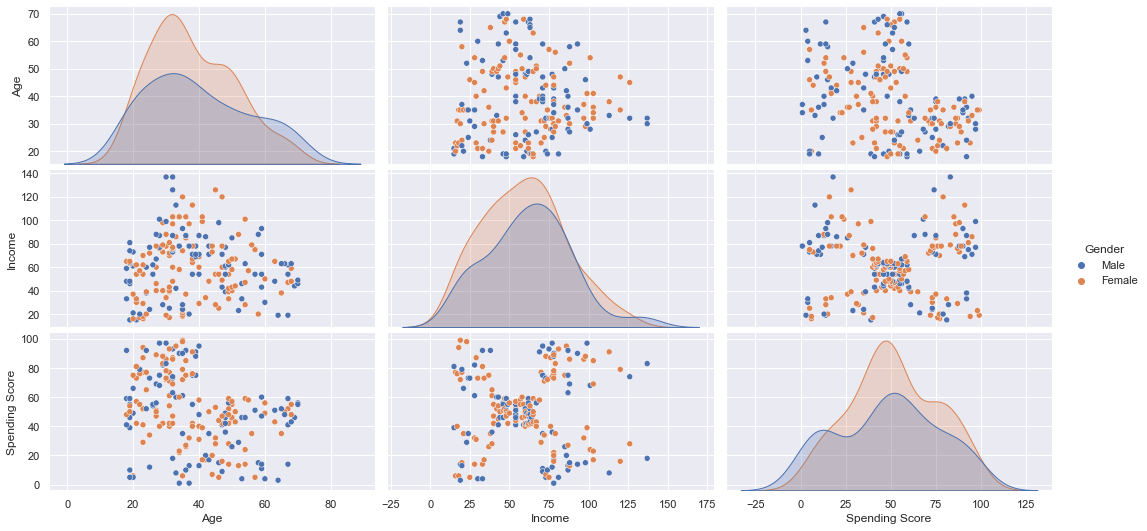

In [151]:
# Let's see our data in a detailed way with pairplot

sns.pairplot(dataset.drop('CustomerID', axis=1), hue='Gender', aspect=2)
plt.show()


* From the above plot we see that gender has no direct relation to segmenting customers.


* That's why we can drop it and move on with other features,we will call it X parameter from now on.


In [178]:

X = dataset.drop(['CustomerID', 'Gender'], axis=1)

## Correlations

Now I will check the correlation between age and spending score indicates how these two variables are related to each other. The correlation coefficient ranges from -1 to 1, with values closer to -1 or 1 indicating a stronger correlation and values closer to 0 suggesting a weaker correlation.

* If the correlation coefficient is positive (close to 1), it means there is a positive correlation between age and spending score. In other words, as a customer's age increases, their spending score tends to increase as well. This suggests that older customers tend to spend more at the mall compared to younger customers.

* If the correlation coefficient is negative (close to -1), it means there is a negative correlation between age and spending score. This implies that as a customer's age increases, their spending score tends to decrease. In this case, younger customers may have higher spending scores compared to older customers.

* If the correlation coefficient is close to 0, it indicates a weak or no linear correlation between age and spending score. This means that there is no clear relationship between the two variables. Age and spending score may vary independently of each other, and one variable does not consistently affect the other.

* To summarize, the correlation coefficient helps us understand how age and spending score are related in the dataset. A positive correlation suggests that older customers tend to have higher spending scores, a negative correlation indicates that younger customers may have higher spending scores, and a correlation close to 0 implies no significant linear relationship between age and spending score.







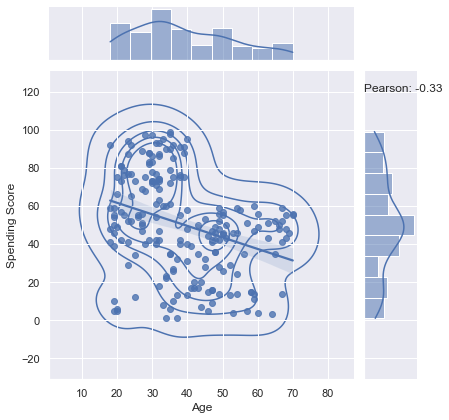

In [154]:
# Calculate Pearson's correlation
corr, _ = pearsonr(dataset['Age'], dataset['Spending Score'])

# Create a joint plot
jp = sns.jointplot('Age', 'Spending Score', data=dataset, kind='reg')
jp.plot_joint(sns.kdeplot, zorder=0, n_levels=6)

# Display the correlation coefficient on the plot
plt.text(0, 120, 'Pearson: {:.2f}'.format(corr))

# Show the plot
plt.show()

## Clustering using K- means

K-means clustering is a popular unsupervised machine learning algorithm used for clustering or grouping similar data points together. The goal of k-means clustering is to partition a given dataset into k distinct clusters, where each data point belongs to the cluster with the nearest mean value.

Here's how the k-means clustering algorithm works:

* 1.Choose the number of clusters (k) that you want to create.

* 2.Initialize k cluster centroids randomly. Each centroid represents the center of a cluster.

* 3.Assign each data point to the nearest centroid based on a distance metric, usually Euclidean distance. This step      forms the initial clusters.

* 4.Calculate the mean of each cluster, which becomes the new centroid for that cluster.

* 5.Repeat steps 3 and 4 until convergence is achieved. Convergence occurs when the centroids no longer change significantly or when a maximum number of iterations is reached.

* 6.The final result is a set of k clusters, each represented by its centroid.



K-means clustering has several applications in various domains, including customer segmentation, image compression, anomaly detection, and document clustering. It is widely used due to its simplicity, efficiency, and interpretability.

* Limitations: k-means clustering also has some limitations. It assumes that clusters are spherical, equally sized, and have similar densities, and it can be sensitive to the initial placement of centroids.

To evaluate the quality of k-means clustering, common techniques include the elbow method, silhouette analysis, and domain-specific validation measures. These methods help determine the optimal number of clusters and assess the separation and compactness of the resulting clusters.

Overall, k-means clustering is a powerful tool for exploring and analyzing data by grouping similar data points together based on their features. It enables the discovery of patterns, structure, and insights within datasets, allowing for better understanding and decision-making in various fields.

#### Elbow method


The elbow method is a technique used to determine the optimal number of clusters (k) in k-means clustering. It is called the elbow method because the plot of the number of clusters against the within-cluster sum of squares (WCSS) forms an "elbow" shape.

Here's how the elbow method works:

* 1.Perform k-means clustering on the dataset for a range of k values (e.g., from 1 to 10).

* 2.For each k value, calculate the WCSS, which is the sum of the squared distances between each data point and its assigned centroid within the cluster.

* 3.Plot the number of clusters (k) on the x-axis and the corresponding WCSS on the y-axis.

* 4.Examine the resulting plot. As the number of clusters increases, the WCSS generally decreases because more clusters lead to smaller within-cluster distances. However, at some point, the rate of decrease in WCSS slows down.

* 5.Look for the "elbow" in the plot, which is the point of inflection or sudden change in the rate of decrease of WCSS. This point indicates the optimal number of clusters where adding more clusters provides diminishing returns in terms of reducing WCSS.

The elbow method is important in k-means clustering because it helps in selecting the appropriate number of clusters for a given dataset. Choosing the optimal number of clusters is crucial as it affects the interpretability and performance of the clustering results. If the number of clusters is too small, important patterns or subgroups may be overlooked. On the other hand, if the number of clusters is too large, the clustering may become overfit and less meaningful.

By using the elbow method, we can visually identify the optimal number of clusters by observing the point on the plot where the WCSS significantly decreases, forming an elbow-like shape. This allows us to strike a balance between capturing meaningful patterns in the data and avoiding excessive complexity. It provides a data-driven approach to guide the selection of the appropriate number of clusters in k-means clustering.

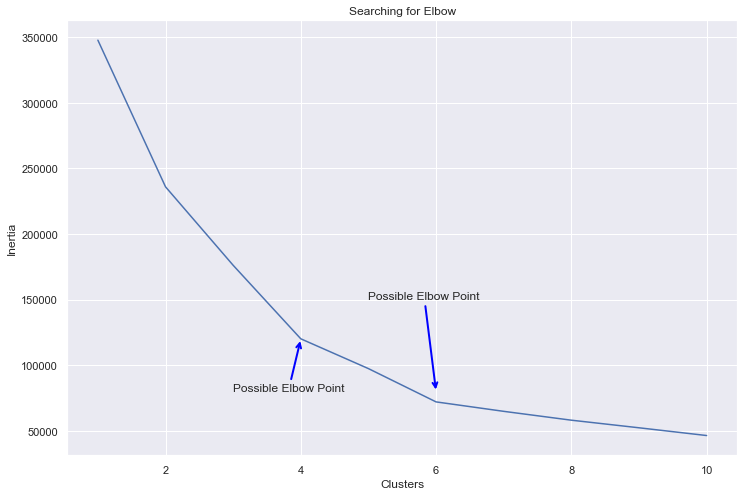

In [183]:
from sklearn.cluster import KMeans

clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X) #Where X = dataset.drop(['CustomerID', 'Gender'], axis=1)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow
ax.annotate('Possible Elbow Point', xy=(4, 120000), xytext=(3, 80000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible Elbow Point', xy=(6, 80000), xytext=(5, 150000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()


In [193]:
# Determine the optimal number of clusters (k) using the elbow method
k = 4  # Replace with the determined optimal k value

# Perform k-means clustering with the optimal k value
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Add the cluster labels to the dataset
dataset['Cluster'] = labels

# Print the cluster assignments
print(dataset['Cluster'])

0      0
1      0
2      0
3      0
4      0
      ..
195    1
196    3
197    1
198    3
199    1
Name: Cluster, Length: 200, dtype: int32


In [194]:
print(X)

     Age  Income  Spending Score Age_Group
0     19      15              39        15
1     21      15              81        20
2     20      16               6        15
3     23      16              77        20
4     31      17              40        30
..   ...     ...             ...       ...
195   35     120              79        30
196   45     126              28        40
197   32     126              74        30
198   32     137              18        30
199   30     137              83        25

[200 rows x 4 columns]


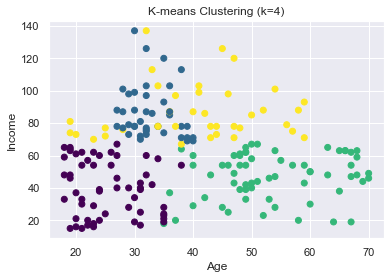

In [195]:
# Visualize the clusters between Age and Income using scatter plots
plt.scatter(X['Age'], X['Income'], c=labels, cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('K-means Clustering (k={})'.format(k))
plt.show()

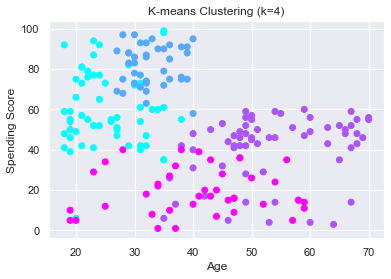

In [198]:
# Visualize the clusters between Age and Spending Score using scatter plots
plt.scatter(X['Age'], X['Spending Score'], c=labels, cmap='cool')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('K-means Clustering (k={})'.format(k))
plt.show()

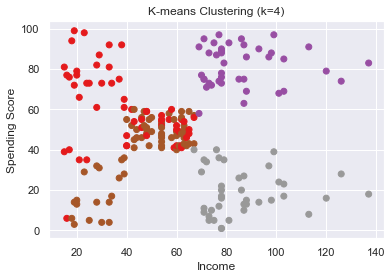

In [199]:
# Visualize the clusters between Income and Spending Score using scatter plots
plt.scatter(X['Income'], X['Spending Score'], c=labels, cmap='Set1')
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.title('K-means Clustering (k={})'.format(k))
plt.show()